## DSC 540 Term Project

### Milestone 5: Merging the Data and Storing in a Database/Visualizing Data
#### Milan Sherman

In [1]:
import sqlite3 as sql
import pandas as pd

### Outline
- Import csv's for each of the three dataframes from Milestones 2-4
    - Offense stats (flat file)
    - Defense stats (web scraped)
    - Final Ranking (API)
- Check that they can be joined
    - I plan to join these dataframes by Year by Team
    - The 'Year' field in the Defense dataframe seemed to be converted to month-day-year format, and will need to be converted back to year
    - The team names in the Offense dataframe remove the space between team names made up of more than one word, e.g., 'AirForce' instead of 'Air Force'.  This will need to be addressed in order join the dataframes
- Load the dataframes into sqlite database and join them
    - The dataframes do not have the same number of rows. The defense dataframe has the most rows, then offense, then rank, so I'll left join offense to defense, and then left join rank to that.
- Visualizations
    - Top 25 Teams by Conference by Year
    - Top 10 Teams by Conference by Year
    - National Champions by Conference by Year
    - National Champions by Team
    - Defensive Rank vs. Final Rank
    - Passer Rating vs. Final Rank
    - Defensive Rank vs. Passer Rating
    - Heatmap of Correlation of Numerical Features

### Offense Dataframe
#### Offensive Statistics for each team, 2010-2021

In [2]:
import os
os.chdir(r'C:\Users\milan\Documents\GitHub\DS-540\Term Project')
offense = pd.read_csv('offense_stats.csv')
offense.head()

,Unnamed: 0,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct
0,0,AirForce,2010,AirForce2010,88,168,52.4,1551,9.2,63,12,6,146.359524,5,-25,748,5.3,916,81.7,18.3
1,1,AirForce,2011,AirForce2011,123,204,60.3,1821,8.9,55,16,8,153.315686,10,-64,723,5.7,927,78.0,22.0
2,2,AirForce,2012,AirForce2012,83,151,55.0,1334,8.8,58,9,8,138.249007,9,-46,804,5.1,955,84.2,15.8
3,3,AirForce,2013,AirForce2013,93,174,53.4,1259,7.2,71,8,4,124.802299,9,-79,637,4.9,811,78.6,21.4
4,4,AirForce,2014,AirForce2014,117,206,56.8,1893,9.2,74,15,4,154.132039,12,-80,796,4.5,1002,79.4,20.6


I am going to drop the unnamed column at the beginning of the dataframe and the Team ID field, and rename the 'UniversityName' to 'Team'

In [3]:
offense = offense.drop(offense.columns[0], axis =1)
offense = offense.drop('TeamID', axis=1)
offense = offense.rename(columns = {'UniversityName':'Team'})
offense.head()

,Team,Year,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct
0,AirForce,2010,88,168,52.4,1551,9.2,63,12,6,146.359524,5,-25,748,5.3,916,81.7,18.3
1,AirForce,2011,123,204,60.3,1821,8.9,55,16,8,153.315686,10,-64,723,5.7,927,78.0,22.0
2,AirForce,2012,83,151,55.0,1334,8.8,58,9,8,138.249007,9,-46,804,5.1,955,84.2,15.8
3,AirForce,2013,93,174,53.4,1259,7.2,71,8,4,124.802299,9,-79,637,4.9,811,78.6,21.4
4,AirForce,2014,117,206,56.8,1893,9.2,74,15,4,154.132039,12,-80,796,4.5,1002,79.4,20.6


### Defense Dataframe
#### Defensive Statistics for each team, 2010-2021

In [4]:
defense = pd.read_csv('defense rankings.csv')
defense.head()

,Year,Rank,Name,G,Rush Yards Allowed,Pass Yards Allowed,Total Yards Allowed,Plays,Yards/G Allowed,Yards/Play Allowed
0,2010-01-01,1,TCU,13,1296,1674,2970,714,228.5,4.16
1,2010-01-01,2,Boise State,13,1349,1962,3311,832,254.7,3.98
2,2010-01-01,3,West Virginia,13,1124,2270,3394,803,261.1,4.23
3,2010-01-01,4,Ohio State,13,1253,2152,3405,789,261.9,4.32
4,2010-01-01,5,Alabama,13,1432,2291,3723,802,286.4,4.64


#### Data Cleaning
The 'Year' field is currently an object data type.  Below I create function to convert it to datetime, rename it to 'date', extract the year from the date into a new 'Year' column, and then delete the 'date' column.  I also rename the 'Name' field to 'Team'

In [5]:
def fix_year(df):
    import numpy as np
    # Date Features
    df['Year'] = pd.to_datetime(df['Year'])
    df = df.rename(columns = {'Year':'date'})
    df['Year'] = df['date'].dt.year
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

In [6]:
defense = fix_year(defense)
defense = defense.rename(columns = {'Name':'Team'})
defense.head()

,Rank,Team,G,Rush Yards Allowed,Pass Yards Allowed,Total Yards Allowed,Plays,Yards/G Allowed,Yards/Play Allowed,Year
0,1,TCU,13,1296,1674,2970,714,228.5,4.16,2010
1,2,Boise State,13,1349,1962,3311,832,254.7,3.98,2010
2,3,West Virginia,13,1124,2270,3394,803,261.1,4.23,2010
3,4,Ohio State,13,1253,2152,3405,789,261.9,4.32,2010
4,5,Alabama,13,1432,2291,3723,802,286.4,4.64,2010


### Final Ranking Dataframe
#### Top 25 Teams in the nation each year, 2010-2021

In [7]:
ranking = pd.read_csv('Final Rankings.csv')
ranking.head()

,Unnamed: 0,Final Rank,Team,Conference,Year
0,0,1,Auburn,SEC,2010
1,1,2,TCU,Mountain West,2010
2,2,3,Oregon,Pac-10,2010
3,3,4,Stanford,Pac-10,2010
4,4,5,Ohio State,Big Ten,2010


Drop unnamed column and rename 'Final Rank' column

In [8]:
ranking = ranking.drop(ranking.columns[0], axis=1)
ranking = ranking.rename(columns = {'Final Rank':'final_rank'})
ranking.head()

,final_rank,Team,Conference,Year
0,1,Auburn,SEC,2010
1,2,TCU,Mountain West,2010
2,3,Oregon,Pac-10,2010
3,4,Stanford,Pac-10,2010
4,5,Ohio State,Big Ten,2010


Check data type of the 'Year' field in each dataframe to ensure they can be joined

In [9]:
offense.dtypes

Team              object
Year               int64
completions        int64
attempts           int64
CMPPercent       float64
passing_yds        int64
YPA              float64
LNG                int64
TD                 int64
INT                int64
passer_rating    float64
SACK               int64
sack_yds_lost      int64
run_attempts       int64
run_YPA          float64
total_plays        int64
run_pct          float64
pass_pct         float64
dtype: object

In [10]:
defense.dtypes

Rank                     int64
Team                    object
G                        int64
Rush Yards Allowed       int64
Pass Yards Allowed       int64
Total Yards Allowed      int64
Plays                    int64
Yards/G Allowed        float64
Yards/Play Allowed     float64
Year                     int64
dtype: object

In [12]:
ranking.dtypes

final_rank     int64
Team          object
Conference    object
Year           int64
dtype: object

The 'Year' field is an integer in all three, so this should work for joining

#### Data Cleaning
Now I address the inconsistency in the team names between dataframes.  I begin by looking at the format of the team name in each of the three dataframes

In [13]:
offense['Team'].unique()

array(['AirForce', 'Akron', 'Alabama', 'AppalachianState', 'Arizona',
       'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn',
       'BallState', 'Baylor', 'BoiseState', 'BostonCollege',
       'BowlingGreen', 'Buffalo', 'BYU', 'Cal', 'CentralMichigan',
       'Charlotte', 'Cincinnati', 'Clemson', 'CoastalCarolina',
       'Colorado', 'ColoradoState', 'Duke', 'EastCarolina',
       'EasternMichigan', 'Florida', 'FloridaAtlantic',
       'FloridaInternational', 'FloridaState', 'FresnoState', 'Georgia',
       'GeorgiaSouthern', 'GeorgiaState', 'GeorgiaTech', 'Hawaii',
       'Houston', 'Illinois', 'Iowa', 'IowaState', 'Kansas',
       'KansasState', 'KentState', 'Kentucky', 'Liberty', 'Louisiana',
       'LouisianaTech', 'Louisville', 'LSU', 'Marshall', 'Maryland',
       'Memphis', 'Miami', 'MiamiOH', 'Michigan', 'MichiganState',
       'MiddleTennessee', 'Minnesota', 'MississippiState', 'Missouri',
       'Navy', 'NCState', 'Nebraska', 'Nevada', 'NewMexico',
       'NewM

In [14]:
defense['Team'].unique()

array(['TCU', 'Boise State', 'West Virginia', 'Ohio State', 'Alabama',
       'Texas', 'Syracuse', 'Pittsburgh', 'Florida', 'Kent State',
       'Nebraska', 'LSU', 'Boston College', 'Louisville', 'UCF', 'Temple',
       'South Florida', 'California', 'Clemson', 'Wisconsin', 'Stanford',
       'Miami (Florida)', 'Georgia', 'BYU', 'Iowa', 'Northern Illinois',
       'Utah', 'Miami (Ohio)', 'Army', 'North Carolina',
       'North Carolina State', 'Arizona', 'Buffalo', 'Oregon',
       'Penn State', 'Arkansas', 'Air Force', 'Illinois', 'Maryland',
       'SMU', 'Ohio', 'Florida State', 'Michigan State',
       'San Diego State', 'Kentucky', 'South Carolina', 'Missouri',
       'Southern Mississippi', 'Mississippi State', "Hawai'i",
       'Notre Dame', 'Virginia Tech', 'Oklahoma', 'Nevada', 'Texas A&M',
       'Toledo', 'Connecticut', 'Arizona State', 'Fresno State', 'Auburn',
       'Florida International', 'Purdue', 'Cincinnati', 'Georgia Tech',
       'Rutgers', 'Central Michigan', 'Wes

In [15]:
ranking['Team'].unique()

array(['Auburn', 'TCU', 'Oregon', 'Stanford', 'Ohio State', 'Oklahoma',
       'Wisconsin', 'LSU', 'Boise State', 'Alabama', 'Nevada', 'Arkansas',
       'Oklahoma State', 'Michigan State', 'Mississippi State',
       'Virginia Tech', 'Florida State', 'Missouri', 'Texas A&M',
       'Nebraska', 'UCF', 'South Carolina', 'Maryland', 'Tulsa',
       'NC State', 'USC', 'Michigan', 'Baylor', 'Kansas State',
       'West Virginia', 'Houston', 'Georgia', 'Southern Mississippi',
       'Clemson', 'Cincinnati', 'Notre Dame', 'Florida', 'Louisville',
       'Utah State', 'Northwestern', 'Texas', 'Oregon State',
       'San José State', 'Northern Illinois', 'Vanderbilt', 'UCLA',
       'Arizona State', 'Duke', 'Washington', 'Georgia Tech', 'Ole Miss',
       'Arizona', 'Utah', 'Marshall', 'Memphis', 'Iowa', 'North Carolina',
       'Navy', 'Tennessee', 'Western Kentucky', 'Penn State',
       'Western Michigan', 'Colorado', 'South Florida', 'Miami',
       'San Diego State', 'Washington State', '

The defense and ranking dataframes are consistent, but the offense dataframe removes the space in team names that have one.  I will fuzzy match on the 'Team' field in the defense dataframe using get_close_matches from the difflib library

In [17]:
import difflib

# create a copy of the offense df (so I don't have to re-load every time I tweak my code)
offense2 = offense.copy()

#create duplicate column to retain the original team name (just in case)
offense2['team_match'] = offense2['Team']

#convert team name in offense2 to team name it most closely matches in defense
offense2['Team2'] = offense2['Team'].apply(lambda x: difflib.get_close_matches(x, defense['Team'],1))
offense2

,Team,Year,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct,team_match,Team2
0,AirForce,2010,88,168,52.4,1551,9.2,63,12,6,146.359524,5,-25,748,5.3,916,81.7,18.3,AirForce,[Air Force]
1,AirForce,2011,123,204,60.3,1821,8.9,55,16,8,153.315686,10,-64,723,5.7,927,78.0,22.0,AirForce,[Air Force]
2,AirForce,2012,83,151,55.0,1334,8.8,58,9,8,138.249007,9,-46,804,5.1,955,84.2,15.8,AirForce,[Air Force]
3,AirForce,2013,93,174,53.4,1259,7.2,71,8,4,124.802299,9,-79,637,4.9,811,78.6,21.4,AirForce,[Air Force]
4,AirForce,2014,117,206,56.8,1893,9.2,74,15,4,154.132039,12,-80,796,4.5,1002,79.4,20.6,AirForce,[Air Force]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,Wyoming,2016,210,379,55.4,3207,8.5,54,29,15,143.822691,27,-200,628,4.6,1007,62.4,37.6,Wyoming,[Wyoming]
1368,Wyoming,2017,195,348,56.0,2304,6.6,53,18,8,124.119540,26,-177,446,3.2,794,56.2,43.8,Wyoming,[Wyoming]
1369,Wyoming,2018,135,276,48.9,1576,5.7,72,8,4,103.544928,24,-204,495,4.8,771,64.2,35.8,Wyoming,[Wyoming]
1370,Wyoming,2019,120,256,46.9,1770,6.9,63,11,9,112.101562,21,-142,575,4.9,831,69.2,30.8,Wyoming,[Wyoming]


The above found a match in the defense dataframe, but returns it as a list object.  Below I convert it to a string column and drop and rename some columns

In [18]:
# drop the 'Team' and 'team_match' columns (I do this first because I want to use 'Team' as the name for the field I am
# creating from the list column)
offense2 = offense2.drop(['Team', 'team_match'],axis=1)

# convert the list object to a string column
offense2['Team']=offense2['Team2'].apply(lambda x: ','.join(map(str, x)))

# drop the column with the list object
offense2 = offense2.drop('Team2', axis=1)
offense2

,Year,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct,Team
0,2010,88,168,52.4,1551,9.2,63,12,6,146.359524,5,-25,748,5.3,916,81.7,18.3,Air Force
1,2011,123,204,60.3,1821,8.9,55,16,8,153.315686,10,-64,723,5.7,927,78.0,22.0,Air Force
2,2012,83,151,55.0,1334,8.8,58,9,8,138.249007,9,-46,804,5.1,955,84.2,15.8,Air Force
3,2013,93,174,53.4,1259,7.2,71,8,4,124.802299,9,-79,637,4.9,811,78.6,21.4,Air Force
4,2014,117,206,56.8,1893,9.2,74,15,4,154.132039,12,-80,796,4.5,1002,79.4,20.6,Air Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2016,210,379,55.4,3207,8.5,54,29,15,143.822691,27,-200,628,4.6,1007,62.4,37.6,Wyoming
1368,2017,195,348,56.0,2304,6.6,53,18,8,124.119540,26,-177,446,3.2,794,56.2,43.8,Wyoming
1369,2018,135,276,48.9,1576,5.7,72,8,4,103.544928,24,-204,495,4.8,771,64.2,35.8,Wyoming
1370,2019,120,256,46.9,1770,6.9,63,11,9,112.101562,21,-142,575,4.9,831,69.2,30.8,Wyoming


### Join dataframes
I am going to try merging the dataframes in pandas so that I know that I'll be able to join them when I query them from the sqlite database using sql.  I begin by checking the data types of the offense and defense dataframes

In [19]:
defense.dtypes

Rank                     int64
Team                    object
G                        int64
Rush Yards Allowed       int64
Pass Yards Allowed       int64
Total Yards Allowed      int64
Plays                    int64
Yards/G Allowed        float64
Yards/Play Allowed     float64
Year                     int64
dtype: object

In [20]:
offense.dtypes

Team              object
Year               int64
completions        int64
attempts           int64
CMPPercent       float64
passing_yds        int64
YPA              float64
LNG                int64
TD                 int64
INT                int64
passer_rating    float64
SACK               int64
sack_yds_lost      int64
run_attempts       int64
run_YPA          float64
total_plays        int64
run_pct          float64
pass_pct         float64
dtype: object

In [21]:
combined = pd.merge(defense, offense2, on=['Team','Year'], how='left')
combined

,Rank,Team,G,Rush Yards Allowed,Pass Yards Allowed,Total Yards Allowed,Plays,Yards/G Allowed,Yards/Play Allowed,Year,...,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct
0,1,TCU,13,1296,1674,2970,714,228.5,4.16,2010,...,29.0,6.0,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6
1,2,Boise State,13,1349,1962,3311,832,254.7,3.98,2010,...,38.0,6.0,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6
2,3,West Virginia,13,1124,2270,3394,803,261.1,4.23,2010,...,24.0,8.0,141.569634,28.0,-223.0,526.0,3.9,908.0,57.9,42.1
3,4,Ohio State,13,1253,2152,3405,789,261.9,4.32,2010,...,30.0,13.0,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0
4,5,Alabama,13,1432,2291,3723,802,286.4,4.64,2010,...,24.0,5.0,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,126,Kansas,12,2998,2837,5835,809,486.3,7.21,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,127,New Mexico State,12,2349,3493,5842,798,486.8,7.32,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,128,Florida International,12,2758,3154,5912,882,492.7,6.70,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1529,129,Arkansas State,12,3133,2938,6071,840,505.9,7.23,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I was under the impression that the offense dataframe had stats from 2010 to 2021, but I am seeing a lot of NaNs for 2021. 

In [22]:
offense2.Year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

Apparently there is no data for 2021 in the offense dataframe.  However, I have data for 2021 in the other two dataframes, so I'm not going to drop that year.

I now left join the ranking dataframe, which has the Top 25 teams for each year, so I expect a larger number of NaNs for those fields as the other two dataframes have 120-130 teams for each year.

In [23]:
football = pd.merge(combined, ranking, on=['Team', 'Year'], how='left')
football

,Rank,Team,G,Rush Yards Allowed,Pass Yards Allowed,Total Yards Allowed,Plays,Yards/G Allowed,Yards/Play Allowed,Year,...,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct,final_rank,Conference
0,1,TCU,13,1296,1674,2970,714,228.5,4.16,2010,...,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6,2.0,Mountain West
1,2,Boise State,13,1349,1962,3311,832,254.7,3.98,2010,...,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6,9.0,Western Athletic
2,3,West Virginia,13,1124,2270,3394,803,261.1,4.23,2010,...,141.569634,28.0,-223.0,526.0,3.9,908.0,57.9,42.1,NaN,NaN
3,4,Ohio State,13,1253,2152,3405,789,261.9,4.32,2010,...,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0,5.0,Big Ten
4,5,Alabama,13,1432,2291,3723,802,286.4,4.64,2010,...,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7,10.0,SEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,126,Kansas,12,2998,2837,5835,809,486.3,7.21,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,127,New Mexico State,12,2349,3493,5842,798,486.8,7.32,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,128,Florida International,12,2758,3154,5912,882,492.7,6.70,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1529,129,Arkansas State,12,3133,2938,6071,840,505.9,7.23,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I am satisfied that my data is ready to load to a sqlite database

   ### Load sqlite database tables

First I check the order of the columns in the pandas dataframes, and then create the tables

In [283]:
defense.columns

Index(['Rank', 'Team', 'G', 'Rush Yards Allowed', 'Pass Yards Allowed',
       'Total Yards Allowed', 'Plays', 'Yards/G Allowed', 'Yards/Play Allowed',
       'Year'],
      dtype='object')

In [294]:
query = """
CREATE TABLE "Defense" (
    "Rank"  INTEGER,
    "Team"  TEXT,
    "G"  INTEGER,
    "Rush_YA"  INTEGER,
    "Pass_YA"  INTEGER,
    "Total_YA"  INTEGER,
    "Plays"  INTEGER,
    "YPG"  NUMERIC,
    "YPP"  NUMERIC,
    "Year"  INTEGER)
    """

In [287]:
offense2.columns

Index(['Year', 'completions', 'attempts', 'CMPPercent', 'passing_yds', 'YPA',
       'LNG', 'TD', 'INT', 'passer_rating', 'SACK', 'sack_yds_lost',
       'run_attempts', 'run_YPA', 'total_plays', 'run_pct', 'pass_pct',
       'Team'],
      dtype='object')

In [297]:
query2 = """
CREATE TABLE "Offense" (
    "Year"  INTEGER,
    "Comp"  INTEGER,
    "Att"  INTEGER,
    "CMP_pct"  NUMERIC,
    "Pass_yds"  INTEGER,
    "YPA"  NUMERIC,
    "Lng"  INTEGER,
    "TD"  INTEGER,
    "INT"  INTEGER,
    "Pass_rating"  NUMERIC,
    "Sacks"  INTEGER,
    "Sack_yds"  NUMERIC,
    "Run_attempts"  INTEGER,
    "Run_YPA"  NUMERIC,
    "Total_plays"  INTEGER,
    "Run_pct"  NUMERIC,
    "Pass_pct"  NUMERIC,
    "Team"  TEXT)
    """

In [289]:
ranking.columns

Index(['final_rank', 'Team', 'Conference', 'Year'], dtype='object')

In [290]:
query3 = """
CREATE TABLE "Rank" (
    "Final Rank"  INTEGER,
    "Team"  TEXT,
    "Conference"  TEXT,
    "Year"  INTEGER)
    """

In [25]:
con = sql.connect('Football.sqlite')

In [295]:
curs = con.cursor()
curs.execute("DROP TABLE IF EXISTS Defense")
con.execute(query)
con.commit()

In [298]:
curs.execute("DROP TABLE IF EXISTS Offense")
con.execute(query2)
con.commit()

In [299]:
curs.execute("DROP TABLE IF EXISTS Rank")
con.execute(query3)
con.commit()

Write the offense2 datframe to the sqlite database

In [300]:
offense2.to_sql('Offense', con, if_exists='replace', index = False)

Check my work

In [301]:
curs = con.cursor()
curs.execute('select * from Offense')
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
 
# Display result 
for row in records:
    print(row)

(2010, 88, 168, 52.4, 1551, 9.2, 63, 12, 6, 146.3595238095238, 5, -25, 748, 5.3, 916, 81.7, 18.3, 'Air Force')
(2011, 123, 204, 60.3, 1821, 8.9, 55, 16, 8, 153.3156862745098, 10, -64, 723, 5.7, 927, 78.0, 22.0, 'Air Force')
(2012, 83, 151, 55.0, 1334, 8.8, 58, 9, 8, 138.24900662251656, 9, -46, 804, 5.1, 955, 84.2, 15.8, 'Air Force')
(2013, 93, 174, 53.4, 1259, 7.2, 71, 8, 4, 124.8022988505747, 9, -79, 637, 4.9, 811, 78.6, 21.4, 'Air Force')
(2014, 117, 206, 56.8, 1893, 9.2, 74, 15, 4, 154.13203883495146, 12, -80, 796, 4.5, 1002, 79.4, 20.6, 'Air Force')
(2015, 87, 170, 51.2, 1847, 10.9, 75, 15, 12, 157.44000000000003, 3, -9, 816, 5.5, 986, 82.8, 17.2, 'Air Force')
(2016, 68, 150, 45.3, 1752, 11.7, 75, 14, 8, 163.5786666666667, 17, -104, 827, 5.0, 977, 84.6, 15.4, 'Air Force')
(2017, 69, 142, 48.6, 1321, 9.3, 64, 10, 6, 141.52394366197183, 23, -155, 766, 4.8, 908, 84.4, 15.6, 'Air Force')
(2018, 93, 168, 55.4, 1576, 9.4, 69, 10, 5, 147.84761904761905, 7, -49, 713, 4.8, 881, 80.9, 19.1, 

Load the defense dataframe to the sqlite database

In [302]:
defense.to_sql('Defense', con, if_exists = 'replace', index=False)

C:\Users\milan\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


Check my work

In [303]:
curs.execute('Select * from Defense')
records = curs.fetchall()
for row in records:
    print(row)

(1, 'TCU', 13, 1296, 1674, 2970, 714, 228.5, 4.16, 2010)
(2, 'Boise State', 13, 1349, 1962, 3311, 832, 254.7, 3.98, 2010)
(3, 'West Virginia', 13, 1124, 2270, 3394, 803, 261.1, 4.23, 2010)
(4, 'Ohio State', 13, 1253, 2152, 3405, 789, 261.9, 4.32, 2010)
(5, 'Alabama', 13, 1432, 2291, 3723, 802, 286.4, 4.64, 2010)
(6, 'Texas', 12, 1663, 1939, 3602, 783, 300.2, 4.6, 2010)
(7, 'Syracuse', 13, 1770, 2134, 3904, 856, 300.3, 4.56, 2010)
(8, 'Pittsburgh', 13, 1560, 2406, 3966, 837, 305.1, 4.74, 2010)
(9, 'Florida', 13, 1698, 2287, 3985, 853, 306.5, 4.67, 2010)
(10, 'Kent State', 12, 1166, 2514, 3680, 839, 306.7, 4.39, 2010)
(11, 'Nebraska', 14, 2144, 2151, 4295, 940, 306.8, 4.57, 2010)
(12, 'LSU', 13, 1785, 2208, 3993, 822, 307.2, 4.86, 2010)
(13, 'Boston College', 13, 1074, 2950, 4024, 911, 309.5, 4.42, 2010)
(14, 'Louisville', 13, 1876, 2176, 4052, 814, 311.7, 4.98, 2010)
(15, 'UCF', 14, 1517, 2898, 4415, 926, 315.4, 4.77, 2010)
(16, 'Temple', 12, 1672, 2138, 3810, 816, 317.5, 4.67, 2010)
(1

Load the ranking dataframe to the sqlite database

In [304]:
ranking.to_sql('Rank', con, if_exists='replace', index=False)

Check my work

In [305]:
curs.execute('Select * from Rank')
records = curs.fetchall()
for row in records:
    print(row)

(1, 'Auburn', 'SEC', 2010)
(2, 'TCU', 'Mountain West', 2010)
(3, 'Oregon', 'Pac-10', 2010)
(4, 'Stanford', 'Pac-10', 2010)
(5, 'Ohio State', 'Big Ten', 2010)
(6, 'Oklahoma', 'Big 12', 2010)
(7, 'Wisconsin', 'Big Ten', 2010)
(8, 'LSU', 'SEC', 2010)
(9, 'Boise State', 'Western Athletic', 2010)
(10, 'Alabama', 'SEC', 2010)
(11, 'Nevada', 'Western Athletic', 2010)
(12, 'Arkansas', 'SEC', 2010)
(13, 'Oklahoma State', 'Big 12', 2010)
(14, 'Michigan State', 'Big Ten', 2010)
(15, 'Mississippi State', 'SEC', 2010)
(16, 'Virginia Tech', 'ACC', 2010)
(17, 'Florida State', 'ACC', 2010)
(18, 'Missouri', 'Big 12', 2010)
(19, 'Texas A&M', 'Big 12', 2010)
(20, 'Nebraska', 'Big 12', 2010)
(21, 'UCF', 'Conference USA', 2010)
(22, 'South Carolina', 'SEC', 2010)
(23, 'Maryland', 'ACC', 2010)
(24, 'Tulsa', 'Conference USA', 2010)
(25, 'NC State', 'ACC', 2010)
(1, 'Alabama', 'SEC', 2011)
(2, 'LSU', 'SEC', 2011)
(3, 'Oklahoma State', 'Big 12', 2011)
(4, 'Oregon', 'Pac-12', 2011)
(5, 'Arkansas', 'SEC', 2011)


Pull all the data from the database

In [ ]:
curs = con.cursor()
sql = """
    SELECT * 
    FROM Defense d
    LEFT JOIN Offense o ON o.Team = d.Team AND o.Year = d.Year
    LEFT JOIN Rank r ON r.Team = d.Team AND r.Year = d.Year
    """
curs.execute(sql)
football = pd.DataFrame(curs.fetchall(), columns=[
 'Rank', 'Team', 'G', 'Rush_YA', 'Pass_YA',
       'Total_YA', 'Plays', 'YPG', 'YPP',
       'Year', 'Year2', 'comp', 'att', 'CMPpct', 'pass_yds', 'YPA',
       'LNG', 'TD', 'INT', 'pass_rating', 'sacks', 'sack_yds_lost',
       'run_att', 'run_YPA', 'total_plays', 'run_pct', 'pass_pct',
       'Team2','final_rank', 'Team3', 'Conference', 'Year3'])
football.head()

Drop redundant columns

In [27]:
football = football.drop(['Year2', 'Team2', 'Year3', 'Team3'], axis=1)
football

,Rank,Team,G,Rush_YA,Pass_YA,Total_YA,Plays,YPG,YPP,Year,...,pass_rating,sacks,sack_yds_lost,run_att,run_YPA,total_plays,run_pct,pass_pct,final_rank,Conference
0,1,TCU,13,1296,1674,2970,714,228.5,4.16,2010,...,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6,2.0,Mountain West
1,2,Boise State,13,1349,1962,3311,832,254.7,3.98,2010,...,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6,9.0,Western Athletic
2,3,West Virginia,13,1124,2270,3394,803,261.1,4.23,2010,...,141.569634,28.0,-223.0,526.0,3.9,908.0,57.9,42.1,NaN,None
3,4,Ohio State,13,1253,2152,3405,789,261.9,4.32,2010,...,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0,5.0,Big Ten
4,5,Alabama,13,1432,2291,3723,802,286.4,4.64,2010,...,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7,10.0,SEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,126,Kansas,12,2998,2837,5835,809,486.3,7.21,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1527,127,New Mexico State,12,2349,3493,5842,798,486.8,7.32,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1528,128,Florida International,12,2758,3154,5912,882,492.7,6.70,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1529,129,Arkansas State,12,3133,2938,6071,840,505.9,7.23,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


Rearrange columns

In [28]:
cols = list(football.columns)

In [29]:
football = football[[
 'Team',
 'Conference',
 'Year',
 'final_rank',
 'Rank',
 'G',
 'Rush_YA',
 'Pass_YA',
 'Total_YA',
 'Plays',
 'YPG',
 'YPP',
 'att',
 'comp',
 'CMPpct',
 'pass_yds',
 'YPA',
 'LNG',
 'TD',
 'INT',
 'pass_rating',
 'sacks',
 'sack_yds_lost',
 'run_att',
 'run_YPA',
 'total_plays',
 'run_pct',
 'pass_pct'
 ]]
football.head()

,Team,Conference,Year,final_rank,Rank,G,Rush_YA,Pass_YA,Total_YA,Plays,...,TD,INT,pass_rating,sacks,sack_yds_lost,run_att,run_YPA,total_plays,run_pct,pass_pct
0,TCU,Mountain West,2010,2.0,1,13,1296,1674,2970,714,...,29.0,6.0,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6
1,Boise State,Western Athletic,2010,9.0,2,13,1349,1962,3311,832,...,38.0,6.0,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6
2,West Virginia,None,2010,NaN,3,13,1124,2270,3394,803,...,24.0,8.0,141.569634,28.0,-223.0,526.0,3.9,908.0,57.9,42.1
3,Ohio State,Big Ten,2010,5.0,4,13,1253,2152,3405,789,...,30.0,13.0,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0
4,Alabama,SEC,2010,10.0,5,13,1432,2291,3723,802,...,24.0,5.0,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7


Rename the Rank column from the defense stats so as not to confuse with the rank from the ranking dataframe (which I've named final_ranking)

In [30]:
football = football.rename(columns = {'Rank':'Defense_rank'})
football.head()

,Team,Conference,Year,final_rank,Defense_rank,G,Rush_YA,Pass_YA,Total_YA,Plays,...,TD,INT,pass_rating,sacks,sack_yds_lost,run_att,run_YPA,total_plays,run_pct,pass_pct
0,TCU,Mountain West,2010,2.0,1,13,1296,1674,2970,714,...,29.0,6.0,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6
1,Boise State,Western Athletic,2010,9.0,2,13,1349,1962,3311,832,...,38.0,6.0,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6
2,West Virginia,None,2010,NaN,3,13,1124,2270,3394,803,...,24.0,8.0,141.569634,28.0,-223.0,526.0,3.9,908.0,57.9,42.1
3,Ohio State,Big Ten,2010,5.0,4,13,1253,2152,3405,789,...,30.0,13.0,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0
4,Alabama,SEC,2010,10.0,5,13,1432,2291,3723,802,...,24.0,5.0,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7


Check for duplicates

In [32]:
deduped = football.drop_duplicates()

print('Combined dataframe rows:', football.shape[0])
print('De-duplicated datframe rows:',deduped.shape[0])
print('Defense dataframe rows:', defense.shape[0])
print('Offense dataframe rows:', offense.shape[0])
print('Rank dataframe rows:', ranking.shape[0])

Combined dataframe rows: 1531
De-duplicated datframe rows: 1531
Defense dataframe rows: 1520
Offense dataframe rows: 1372
Rank dataframe rows: 300


There doesn't seem to be any duplicate rows, but the defense dataframe, which we left joined onto, only has 1520 rows, the combined dataframe somehow has 11 more rows.

Check datatype of the combined dataframe pulled from the sqlite database

In [33]:
football.dtypes

Team              object
Conference        object
Year               int64
final_rank       float64
Defense_rank       int64
G                  int64
Rush_YA            int64
Pass_YA            int64
Total_YA           int64
Plays              int64
YPG              float64
YPP              float64
att              float64
comp             float64
CMPpct           float64
pass_yds         float64
YPA              float64
LNG              float64
TD               float64
INT              float64
pass_rating      float64
sacks            float64
sack_yds_lost    float64
run_att          float64
run_YPA          float64
total_plays      float64
run_pct          float64
pass_pct         float64
dtype: object

Many of the columns that were integer were converted to float, likely because they contained NaN values.

Get a dataframe with just the teams that finished in the Top 25 in one of the 10 years in this dataframe

In [34]:
ranked = football[~football['final_rank'].isnull()]
ranked

,Team,Conference,Year,final_rank,Defense_rank,G,Rush_YA,Pass_YA,Total_YA,Plays,...,TD,INT,pass_rating,sacks,sack_yds_lost,run_att,run_YPA,total_plays,run_pct,pass_pct
0,TCU,Mountain West,2010,2.0,1,13,1296,1674,2970,714,...,29.0,6.0,166.849547,9.0,-64.0,600.0,5.4,931.0,64.4,35.6
1,Boise State,Western Athletic,2010,9.0,2,13,1349,1962,3311,832,...,38.0,6.0,179.956604,9.0,-64.0,485.0,5.4,909.0,53.4,46.6
3,Ohio State,Big Ten,2010,5.0,4,13,1253,2152,3405,789,...,30.0,13.0,157.754728,22.0,-133.0,547.0,5.2,896.0,61.0,39.0
4,Alabama,SEC,2010,10.0,5,13,1432,2291,3723,802,...,24.0,5.0,167.784530,32.0,-167.0,467.0,5.1,829.0,56.3,43.7
10,Nebraska,Big 12,2010,20.0,11,14,2144,2151,4295,940,...,16.0,8.0,133.642553,29.0,-197.0,634.0,5.5,916.0,69.2,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,BYU,FBS Independents,2021,19.0,74,13,2042,3015,5057,880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1476,Oklahoma,Big 12,2021,10.0,76,13,1677,3403,5080,887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1477,Utah State,Mountain West,2021,24.0,77,14,2265,3224,5489,946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1491,Wake Forest,ACC,2021,15.0,91,14,2738,3049,5787,988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There should be 300 teams, so a few are missing.  Check by year below.

In [62]:
ranked_teams = ranked.groupby(['Year'])['Team'].count().reset_index(name='count').sort_values(by='Year')
ranked_teams

,Year,count
0,2010,24
1,2011,25
2,2012,24
3,2013,25
4,2014,24
5,2015,24
6,2016,24
7,2017,23
8,2018,25
9,2019,25


So, on one hand we have 11 more rows in the combined dataframe than the defense dataframe that we left joined to, but on the other hand, there seems to be some teams missing from the Top 25 in the combined dataframe.  More work is needed to try to identify what's going on here, i.e., identify the 11 rows in the football dataframe pulled from the sqlite database that are not in the defense dataframe, and identify the 13 rows in the rank dataframe that are missing from the football dataframe.

## Visualizations

Examine how many Top 25 teams each conference had over the last 11 years

In [70]:
conf_df = ranked.groupby(['Conference'])['Team'].count().reset_index(name="count").sort_values(by = 'count')
conf_df

,Conference,count
9,Pac-10,2
12,Sun Belt,2
3,Big East,3
13,Western Athletic,3
7,Mid-American,4
5,Conference USA,6
6,FBS Independents,12
8,Mountain West,14
1,American Athletic,18
0,ACC,32


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Pac-10'),
  Text(1, 0, 'Sun Belt'),
  Text(2, 0, 'Big East'),
  Text(3, 0, 'Western Athletic'),
  Text(4, 0, 'Mid-American'),
  Text(5, 0, 'Conference USA'),
  Text(6, 0, 'FBS Independents'),
  Text(7, 0, 'Mountain West'),
  Text(8, 0, 'American Athletic'),
  Text(9, 0, 'ACC'),
  Text(10, 0, 'Pac-12'),
  Text(11, 0, 'Big 12'),
  Text(12, 0, 'Big Ten'),
  Text(13, 0, 'SEC')])

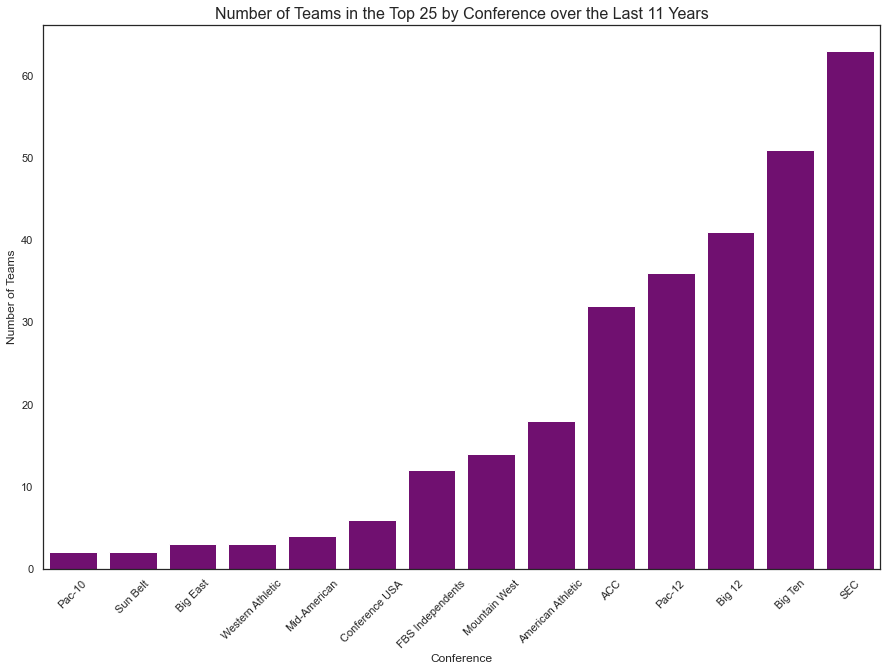

In [71]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.set(style='white')

sn.barplot(x='Conference', y='count', data=conf_df, palette=['purple']) 

#add overall title
plt.title('Number of Teams in the Top 25 by Conference over the Last 11 Years', fontsize=16)
plt.rcParams['figure.figsize'] = (15, 10)
#add axis titles
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.xticks(rotation = 45)

Explore the number of Top 10 teams each conference had over the last 11 years

In [63]:
top_10 = ranked[ranked['final_rank'] < 11]

In [64]:
top_10_conf = top_10.groupby(['Conference'])['Team'].count().reset_index(name='count').sort_values(by = 'count')
top_10_conf

,Conference,count
9,Western Athletic,1
5,Mountain West,2
6,Pac-10,2
4,FBS Independents,4
1,American Athletic,5
0,ACC,12
7,Pac-12,13
2,Big 12,18
3,Big Ten,26
8,SEC,36


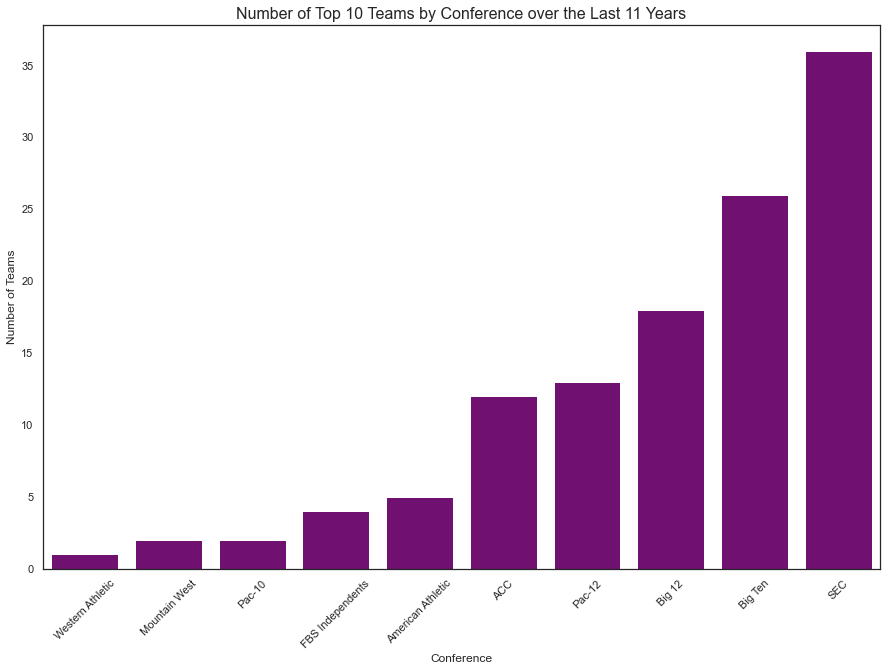

In [72]:
sn.set(style = 'white')
sn.barplot(x = 'Conference', y='count', data = top_10_conf, palette=['purple'])

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Number of Top 10 Teams by Conference over the Last 11 Years', fontsize = 16)
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.xticks(rotation = 45)
plt.show()

Explore the number of National Champions teams each conference had over the last 11 years

In [48]:
natl_champs = ranked[ranked['final_rank'] == 1]
natl_champs_conf = natl_champs.groupby('Conference')['Team'].count().reset_index(name='count').sort_values(by='count')

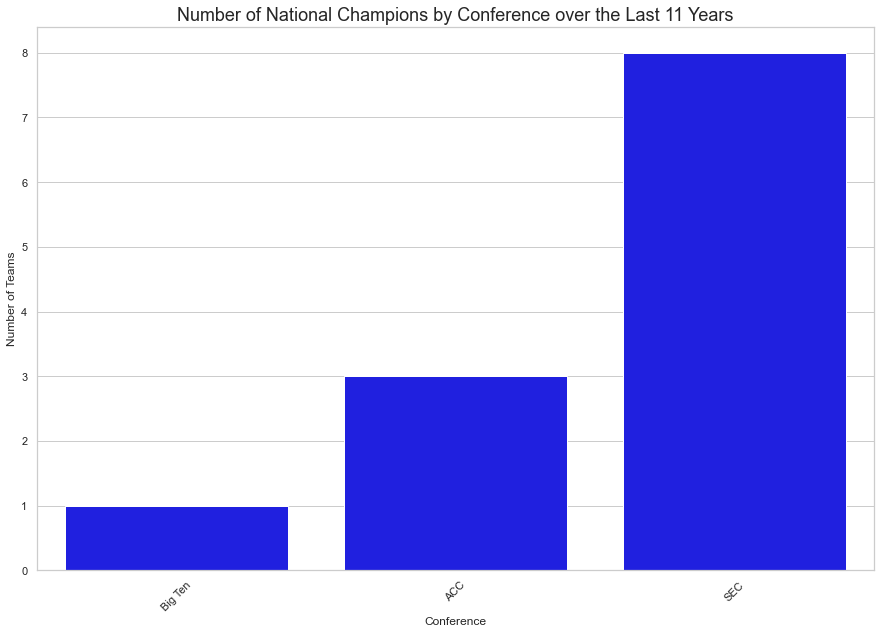

In [49]:
sn.set(style='whitegrid')
sn.barplot(x='Conference', y='count', data=natl_champs_conf, palette=['blue'])

plt.title('Number of National Champions by Conference over the Last 11 Years', fontsize=18)
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.xticks(rotation = 45)
plt.show()

Across the board (Top 25, Top 10, National Champions) the SEC seems to be the dominant conference over the last decade.  The Big 10 and Big 12 were second and third, respectively, in terms of number of Top 25 and Top 10 teams, but the Big 10 only had one national champion, and the Big 12 had none.  The ACC had three national champions, but were fifth overall in the number of Top 25 and Top 10 teams.  This suggests more parity in the Big 10 and Big 12, while the ACC has had a few elite teams but is generally a weaker conference.  

Next I look at which teams won national championships over the last 11 years.

In [68]:
natl_champs = ranked[ranked['final_rank'] == 1]
natl_champs_team = natl_champs.groupby('Team')['Team'].count().reset_index(name='count').sort_values(by='count')
natl_champs_team

,Team,count
1,Auburn,1
3,Florida State,1
4,Georgia,1
5,LSU,1
6,Ohio State,1
2,Clemson,2
0,Alabama,5


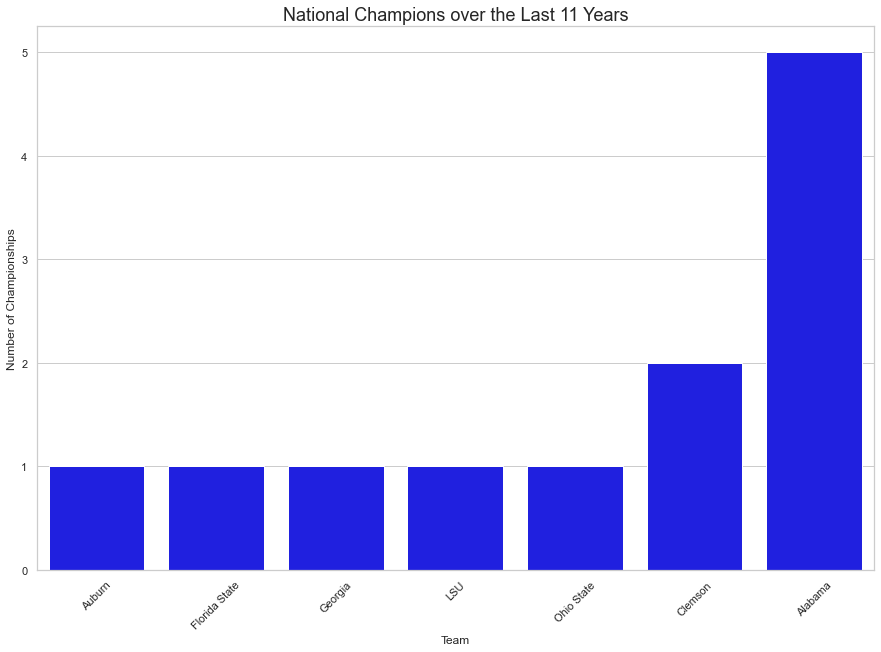

In [69]:
sn.set(style='whitegrid')
sn.barplot(x='Team', y='count', data=natl_champs_team, palette=['blue'])

plt.title('National Champions over the Last 11 Years', fontsize=18)
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.xticks(rotation = 45)
plt.show()

Alabama has won 5 of the last 11 national championships, which helps to explain the SEC's dominance during this time.  However, the SEC still has had 4 different teams win a national championship during this period, while the ACC has had two, the Big 10 has had one, and no other conference has had one.  Furthermore, the SEC has dominated the Top 25 and Top 10 rankings during this time.  These visualizations could be used to answer the question, "Which conference has been the best college football conference over the the last 11 years?"

While interesting, the above visualizations don't leverage the combination of data from different data sources that is present in the football dataframe that was created above.  Below, I look at how various defensive and offensive metrics are related to each other or to a team's final ranking.

Below I look at the correlation of a team's defensive ranking and their final ranking.

Text(0, 0.5, 'Defense Rank')

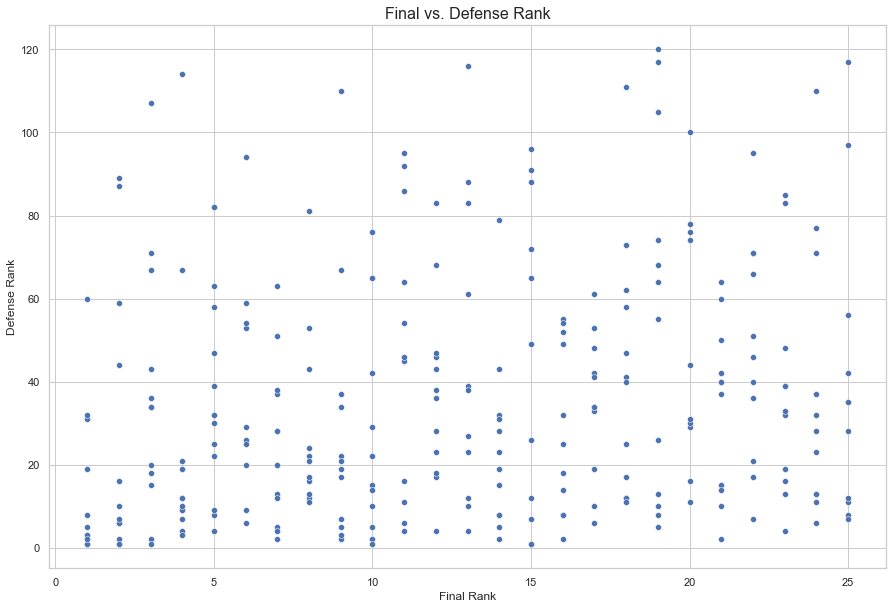

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(style='whitegrid')
 
sn.scatterplot(x="final_rank",
                    y="Defense_rank",
                    data=football)

#add overall title
plt.title('Final vs. Defense Rank', fontsize=16)
plt.rcParams['figure.figsize'] = (15,10)
#add axis titles
plt.xlabel('Final Rank')
plt.ylabel('Defense Rank')

I expected to see a stronger correlation in the scatterplot.  It looks slightly positive, with a bit of a cluster of data points in the lower left quadrant vs. the lower right quadrant, and more in the upper right than the upper left.  But not nearly as strong as I would have expected.

Next I look at the relationship between passer rating, which is an aggregated metric based a number of passing statistics, and final ranking.

Text(0, 0.5, 'Passer Rating')

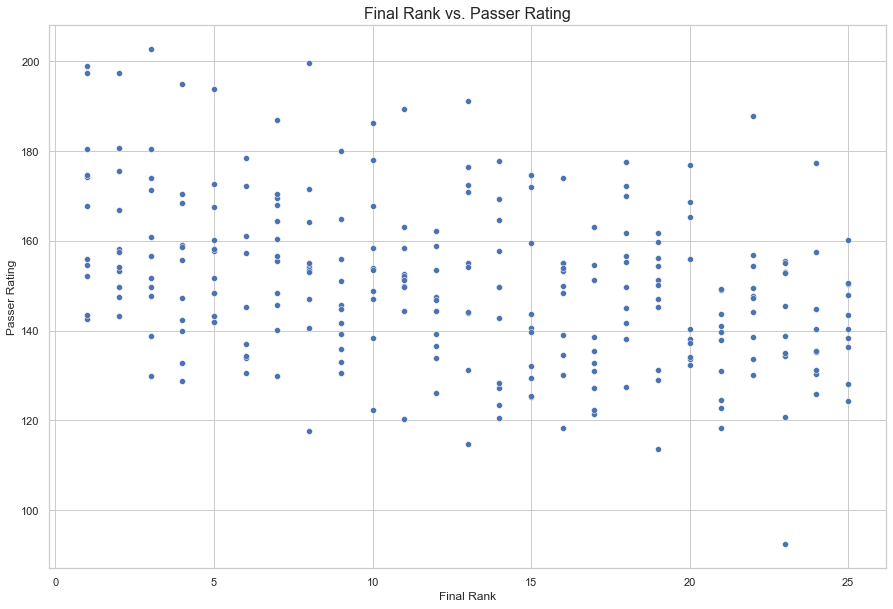

In [53]:
sn.set(style='whitegrid')
 
sn.scatterplot(x="final_rank",
                    y="pass_rating",
                    data=football)

#add overall title
plt.title('Final Rank vs. Passer Rating', fontsize=16)
plt.rcParams['figure.figsize'] = (15,10)
#add axis titles
plt.xlabel('Final Rank')
plt.ylabel('Passer Rating')

This scatterplot shows a slightly clearer pattern, demonstrating a negative relationship between final ranking and passer rating, as a larger passer rating indicates a better passing game while a lower final rank indicates a better team, e.g., the national champion is ranked #1.

Below I look at the relationship between passer rating and defense rank to see if teams with better offenses generally have better defenses too, or vice versa.

Text(0, 0.5, 'Defense Rank')

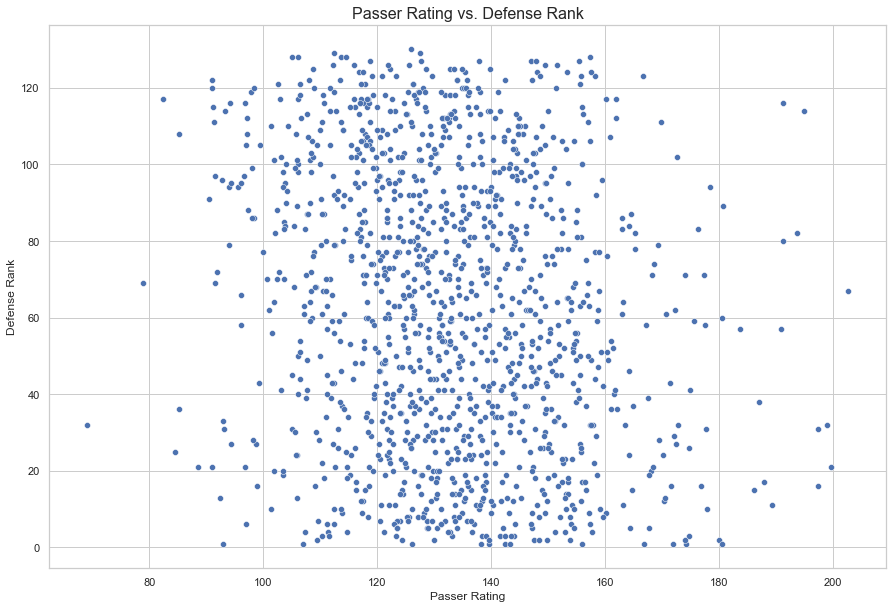

In [57]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(style='whitegrid')
 
sn.scatterplot(x="pass_rating",
                    y="Defense_rank",
                    data=football)

#add overall title
plt.title('Passer Rating vs. Defense Rank', fontsize=16)
plt.rcParams['figure.figsize'] = (15,10)
#add axis titles
plt.xlabel('Passer Rating')
plt.ylabel('Defense Rank')

There is really no discernable pattern here, which is not terribly surprising.  While the teams in the lower right portion are the teams with both good offense and defenses, there seems to be about every combination of good, bad, and average offense and defense.  It is worth noting that passer rating looks more normally distributed, while defense rank does not.  But given that teams can have the same passer rating in a given year, but cannnot have the same defensive rank, this makes sense, i.e., defensive rank is ordinal, but passer rating is not.

Next I create a dataframe of numerical features, i.e, defensive and offensive statistics + final rank) in order to generate a correlation matrix.  Visualizing the correlation matrix using a heatmap will help to quickly identify those metrics that are most highly related to a team's final ranking.

In [73]:
football_num = football[[
'final_rank',
 'Defense_rank',
 'Rush_YA',
 'Pass_YA',
 'Total_YA',
 'Plays',
 'YPG',
 'YPP',
 'att',
 'comp',
 'CMPpct',
 'pass_yds',
 'YPA',
 'LNG',
 'TD',
 'INT',
 'pass_rating',
 'sacks',
 'sack_yds_lost',
 'run_att',
 'run_YPA',
 'total_plays',
 'run_pct',
 'pass_pct'
]]

In [60]:
football_mat = football_num.corr()

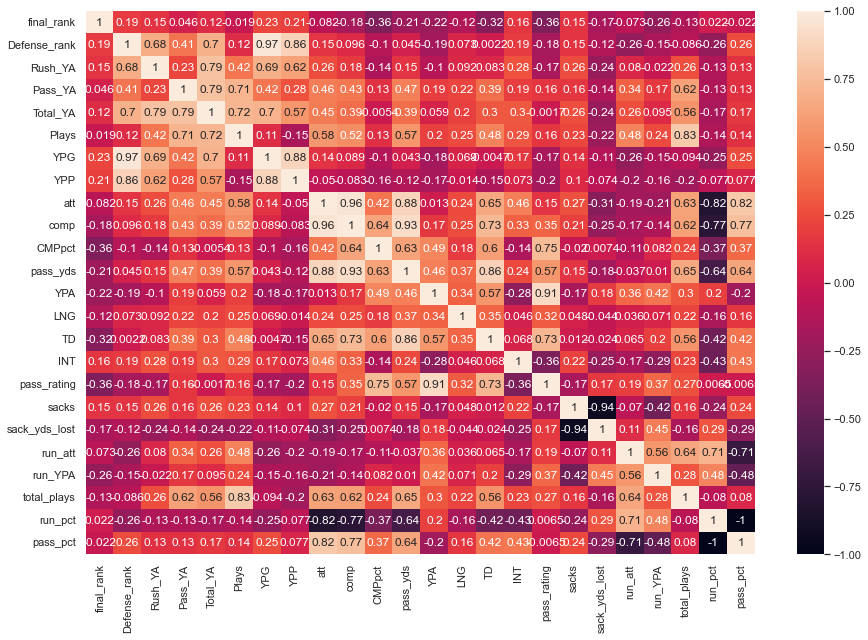

In [61]:
# heatmap to visualize correlations
sn.heatmap(football_mat, annot=True)
plt.show()

It is important to note that generally offensive metrics will be negatively correlated with final ranking because most offensive metrics are better when they are larger (more yards or touchdowns, for example), while the smaller the final ranking, the better (the number 1 team in the country is the national champion).  On the other hand, defensive metrics are generally positively correlated, as the fewer plays or yards that a team allows, the better.

There are a few interesting insights:
1. As reflected in the scatterplots above, defensive rank (0.19) is not as highly correlated with final ranking as passer rating (-0.36).  
2. Completion percentage (-0.36) has the same correlation with final ranking as passer rating.
3. Rushing yards allowed (Rush_YA, 0.15) is more highly correlated with final ranking than passing yards allowed (Pass_YA, 0.046).  This suggests that it's more important for a team to be able to stop the run than the pass.
4. Touchdowns (-0.32) is more highly correlated with final ranking than interceptions (0.16).  This suggests that it may pay off to take some risks in the passing game, i.e., that a touchdown helps you more than an interception hurts you.

## Summary

Overall, I think this project went well and I enjoyed learning how to bring together different data sources and storing the data in a local database.  That being said, I think that I had some data sources that were fairly straightforward to work with.  For the purpose of this project, I think that that was a good thing - it allowed me to gain some experience scraping web data and using an API that will provide a good baseline for doing this again in the future.  I needed to do enough problem solving with each of these data sources that I think I have a few more tools in the toolbox for working with these data sources, but not so much that the experience was not representative of what's involved with these processes. 

I have learned enough to know that I need more experience with both types of data sources before I would consider myself proficient.  Especially with web scraping, I think that having a better understanding of html and the structure of a web page will allow me to become more efficient with writing code to scrape data from a web page.  The web pages that I scraped data from seem fairly static - they were just tables of statistics.  Neither the content nor the layout of these web pages are likely to change often, if at all.  As each year had its own table/page, even future years' statistics would be created as a new page and not affect the pages that I scraped from.  This makes these pages ideal to scrape, as any changes to the structure of the web pages would necessitate rewriting the code that scrapes the data from them.  A question I do not know the answer to is what options are available for data for which there is no publicly available API, and the structure of the page changes frequently.

In terms of the ethical implications of cleaning this data, there are a few that I can think of.  The first is the ethics of web scraping.  If I am pulling these statistics from these sources and integrating and compiling them, I could potentially create a web page that could steal traffic from the web pages that I'm scraping.  As web traffic can be monetized, this is potentially unethical (depending on my motives and how traffic I get).  In addition, for companies that analyze their web traffic in order gain insight about users' behaviors, scraping a site can skew their data and analysis, and cause them to make inaccurate conclusions.  Finally, as noted above, the data that I've pulled from my sqlite database and joined together does not perfectly match up with my original data sources.  That issue would need to be investigated and resolved before the data could be shared or used for analysis, otherwise there is the potential for sharing inaccurate data and/or making incorrect conclusions.  In the case of my project, I don't think any of these are an issue, as I only scraped the site once, and am not sharing my data or any analysis outside of the context of this project.  However, resolving the disrepancies between my data and the original data sources would be necessary if I planned to use this data for a project in my portfolio, as the whole purpose of a portfolio is to share your work.